In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Step 1: Reading the dataset & Pre-Processing

In [45]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#891 entries and 687 values are empty in cabin so dropping cabin
train_data = train_data.drop(columns="Cabin")

In [8]:
# Fill missing Age values with the median age
age_median = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(age_median)

In [9]:
# Fill missing Embarked values with the most frequent port (mode)
embarked_mode = train_data["Embarked"].mode()[0]  
train_data["Embarked"] = train_data["Embarked"].fillna(embarked_mode)

In [10]:
train_data.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Step 2 : Visualization of the dataset

In [11]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

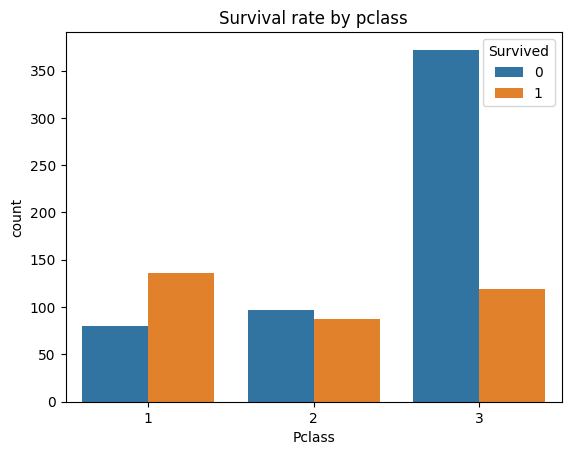

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Pclass", hue="Survived", data=train_data)
plt.title("Survival rate by pclass")
plt.show()

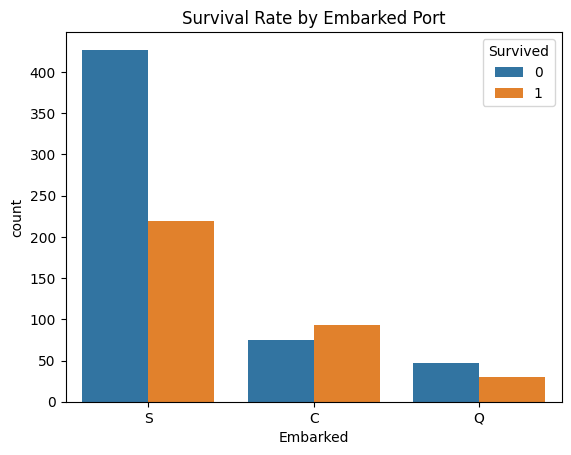

In [13]:
sns.countplot(x="Embarked", hue="Survived", data=train_data)
plt.title("Survival Rate by Embarked Port")
plt.show()

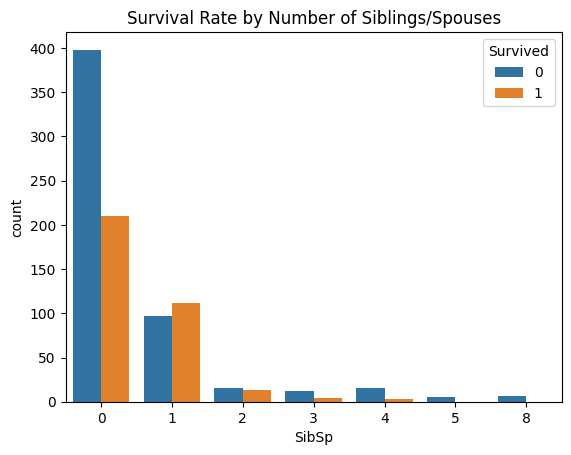

In [14]:
sns.countplot(x="SibSp", hue="Survived", data=train_data)
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.show()

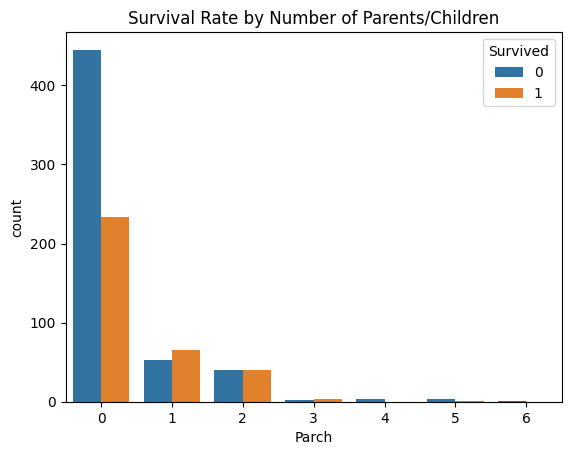

In [15]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.title("Survival Rate by Number of Parents/Children")
plt.show()

# Step 3 : Feature Engineering

In [16]:
# New Feature: Family Size
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1

# Age Groups
train_data["AgeBin"] = pd.cut(train_data["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

# Fare Groups
train_data["FareBin"] = pd.qcut(train_data["Fare"], 4, labels=["Low", "Medium", "High", "VeryHigh"])

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,YoungAdult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,VeryHigh
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,YoungAdult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,YoungAdult,VeryHigh
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,YoungAdult,Medium


In [21]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Sex', 'Embarked', 'AgeBin', 'FareBin']

# Initialize label encoder
le = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    train_data[col] = le.fit_transform(train_data[col])

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,4,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,4,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,4,2


In [23]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns (after encoding)
numeric_cols = ['Pclass', 'Age', 'FamilySize', 'Sex', 'Embarked', 'AgeBin', 'FareBin']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeBin,FareBin
0,1,0,0.827377,"Braund, Mr. Owen Harris",0.737695,-0.565736,1,0,A/5 21171,7.2500,0.585954,0.059160,0.732082,-0.448320
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1.355574,0.663861,1,0,PC 17599,71.2833,-1.942303,0.059160,-1.637708,1.342949
2,3,1,0.827377,"Heikkinen, Miss. Laina",-1.355574,-0.258337,0,0,STON/O2. 3101282,7.9250,0.585954,-0.560975,0.732082,0.447315
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1.355574,0.433312,1,0,113803,53.1000,0.585954,0.059160,0.732082,1.342949
4,5,0,0.827377,"Allen, Mr. William Henry",0.737695,0.433312,0,0,373450,8.0500,0.585954,-0.560975,0.732082,0.447315


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Define features and target
X = train_data[numeric_cols]
y = train_data['Survived']

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [44]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

# ------------------- Load Data -------------------
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Drop 'Cabin' (too many missing values)
train_data.drop(columns='Cabin', inplace=True)
test_data.drop(columns='Cabin', inplace=True)

# ------------------- Feature Engineering Function -------------------
def feature_engineering(df):
    df = df.copy()
    # Fill missing Age and Fare (use median from train set)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # New Feature: Family Size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Age Groups
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                          labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

    # Fare Groups
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=["Low", "Medium", "High", "VeryHigh"])
    
    return df

# Wrap the function in a transformer
feature_engineer = FunctionTransformer(feature_engineering)

# ------------------- Define Column Groups -------------------
numeric_features = ['Pclass', 'Age', 'FamilySize']
categorical_features = ['Sex', 'Embarked', 'AgeBin', 'FareBin']

# ------------------- Preprocessing Pipelines -------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Combine column transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ------------------- Full Pipeline -------------------
pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineer),
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# ------------------- Fit Model on Train -------------------
X_train = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y_train = train_data['Survived']

pipeline.fit(X_train, y_train)

# ------------------- Predict on Test -------------------
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])
predictions = pipeline.predict(X_test)

# ------------------- Save Submission -------------------
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
